In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [26]:
os.chdir(r'C:\Users\avita\Documents\Analytics Lab 2021\Python\Case study\case study data frame')

In [27]:
%pwd

'C:\\Users\\avita\\Documents\\Analytics Lab 2021\\Python\\Case study\\case study data frame'

In [28]:
%cd "C:\Users\avita\Documents\Analytics Lab 2021\Python\Case study\case study data frame"

C:\Users\avita\My Python stufff


In [29]:
%pwd

'C:\\Users\\avita\\Documents\\Analytics Lab 2021\\Python\\Case study\\case study data frame'

In [30]:
customer = pd.read_csv('Customer Acqusition.csv',usecols=["Customer","Age","City","Product","Limit","Company","Segment"])
customer.head()

Customer  Age       City   Product     Limit Company        Segment
0       A1   76  BANGALORE      Gold  500000.0      C1  Self Employed
1       A2   71   CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2       A3   34     COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3       A4   47     BOMBAY  Platimum   10001.0      C4           Govt
4       A5   56  BANGALORE  Platimum   10002.0      C5  Normal Salary

In [31]:
repay = pd.read_csv('Repayment.csv')
repay.head()

SL No: Customer      Month     Amount  Unnamed: 4
0     NaN       A1  12-Jan-04  495414.75         NaN
1     2.0       A1   3-Jan-04  245899.02         NaN
2     3.0       A1  15-Jan-04  259490.06         NaN
3     4.0       A1  25-Jan-04  437555.12         NaN
4     5.0       A1  17-Jan-05  165972.88         NaN

In [32]:
spend = pd.read_csv('spend.csv')
spend.head()

Sl No: Customer      Month       Type     Amount
0       1       A1  12-Jan-04  JEWELLERY  485470.80
1       2       A1   3-Jan-04      PETRO  410556.13
2       3       A1  15-Jan-04    CLOTHES   23740.46
3       4       A1  25-Jan-04       FOOD  484342.47
4       5       A1  17-Jan-05     CAMERA  369694.07

In [33]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 7)
(1523, 5)
(1500, 5)


In [34]:
customer.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [35]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [36]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [37]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [38]:
repay.drop(columns='Unnamed: 4',inplace=True)

In [39]:
repay.head()

SL No: Customer      Month     Amount
0     NaN       A1  12-Jan-04  495414.75
1     2.0       A1   3-Jan-04  245899.02
2     3.0       A1  15-Jan-04  259490.06
3     4.0       A1  25-Jan-04  437555.12
4     5.0       A1  17-Jan-05  165972.88

In [40]:
repay.dropna(inplace=True)

In [41]:
repay.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [42]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [43]:
# 1 (a) In case age is less than 18, replace it with mean of age values.

In [44]:
mean_original = customer["Age"].mean()
print("The mean of Age column is",mean_original)

The mean of Age column is 46.49


In [59]:
mean_original

46.49

In [45]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [46]:
mean_new = customer["Age"].mean()
print("The new mean of Age column is",mean_new)

The new mean of Age column is 48.399399999999986


In [47]:
customer.loc[customer["Age"] < 18,"Age"]
print("All the customers who have age less than 18 have been replaced by mean of the age column.")

All the customers who have age less than 18 have been replaced by mean of the age column.


In [48]:

#  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

SyntaxError: invalid character '’' (U+2019) (Temp/ipykernel_16168/826749777.py, line 2)

In [49]:
customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend

Customer   Age        City   Product     Limit Company        Segment  \
0          A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed   
1          A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed   
2          A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed   
3          A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed   
4          A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed   
...       ...   ...         ...       ...       ...     ...            ...   
1495      A96  54.0     CHENNAI    Silver  100000.0     C19   Salaried_Pvt   
1496      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20           Govt   
1497      A98  51.0    CALCUTTA  Platimum   10001.0     C21  Normal Salary   
1498      A99  35.0    CALCUTTA  Platimum   10002.0     C22  Self Employed   
1499     A100  36.0      COCHIN    Silver  100000.0      C5   Salaried_MNC   

      Sl No:      Month        Type     Amount  
0          1  12-Jan-04   JEWELLERY  485470.80  
1          2   3-Jan-04       PETRO  410556.13  
2          3  15-Jan-04     CLOTHES   23740.46  
3          4  25-Jan-04        FOOD  484342.47  
4          5  17-Jan-05      CAMERA  369694.07  
...      ...        ...         ...        ...  
1495      98  25-Jan-04        BIKE   54729.66  
1496      99  12-Jan-04        AUTO  139018.26  
1497     100   3-Jan-04    SHOPPING  284521.06  
1498     101  15-Jan-04  AIR TICKET   90184.22  
1499     102  25-Jan-04  BUS TICKET  224786.88  

[1500 rows x 11 columns]

In [50]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount  
0  12-Jan-04  JEWELLERY  485470.80  
1   3-Jan-04      PETRO  410556.13  
2  15-Jan-04    CLOTHES   23740.46  
3  25-Jan-04       FOOD  484342.47  
4  17-Jan-05     CAMERA  369694.07

In [51]:
customer_spend.shape

(1500, 11)

In [52]:
customer_spend[customer_spend["Amount"] > customer_spend["Limit"]]

Customer   Age        City   Product     Limit Company        Segment  \
18         A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC   
19         A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC   
20         A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC   
21         A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC   
22         A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC   
...       ...   ...         ...       ...       ...     ...            ...   
1486      A87  27.0    CALCUTTA    Silver  100003.0     C10           Govt   
1496      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20           Govt   
1497      A98  51.0    CALCUTTA  Platimum   10001.0     C21  Normal Salary   
1498      A99  35.0    CALCUTTA  Platimum   10002.0     C22  Self Employed   
1499     A100  36.0      COCHIN    Silver  100000.0      C5   Salaried_MNC   

      Sl No:      Month          Type     Amount  
18       104   3-Jan-04        RENTAL  199554.72  
19       118  28-Feb-05  TRAIN TICKET  376887.49  
20       132   6-Apr-04    BUS TICKET  439648.53  
21       146  23-Nov-04         PETRO  384078.73  
22       160   3-Sep-05     JEWELLERY  117089.16  
...      ...        ...           ...        ...  
1486      89  30-Mar-06        RENTAL  483886.62  
1496      99  12-Jan-04          AUTO  139018.26  
1497     100   3-Jan-04      SHOPPING  284521.06  
1498     101  15-Jan-04    AIR TICKET   90184.22  
1499     102  25-Jan-04    BUS TICKET  224786.88  

[607 rows x 11 columns]

In [61]:
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [62]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount  
0  12-Jan-04  JEWELLERY  485470.80  
1   3-Jan-04      PETRO  410556.13  
2  15-Jan-04    CLOTHES   23740.46  
3  25-Jan-04       FOOD  484342.47  
4  17-Jan-05     CAMERA  369694.07

In [55]:
 # c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [63]:
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [64]:
customer_repay.head()

SL No: Customer      Month     Amount   Age       City Product     Limit  \
0     2.0       A1   3-Jan-04  245899.02  76.0  BANGALORE    Gold  500000.0   
1     3.0       A1  15-Jan-04  259490.06  76.0  BANGALORE    Gold  500000.0   
2     4.0       A1  25-Jan-04  437555.12  76.0  BANGALORE    Gold  500000.0   
3     5.0       A1  17-Jan-05  165972.88  76.0  BANGALORE    Gold  500000.0   
4     6.0       A1  23-Feb-05  365366.62  76.0  BANGALORE    Gold  500000.0   

  Company        Segment  
0      C1  Self Employed  
1      C1  Self Employed  
2      C1  Self Employed  
3      C1  Self Employed  
4      C1  Self Employed

In [65]:
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

SL No: Customer      Month     Amount   Age    City Product     Limit  \
17       8.0       A8   5-Feb-04  156913.59  67.0   PATNA  Silver  100002.0   
18     110.0       A8  12-Jan-04  350999.98  67.0   PATNA  Silver  100002.0   
19     124.0       A8  31-Mar-06  155642.95  67.0   PATNA  Silver  100002.0   
20     138.0       A8   9-May-05  145457.38  67.0   PATNA  Silver  100002.0   
21     152.0       A8   8-May-06  361184.89  67.0   PATNA  Silver  100002.0   
...      ...      ...        ...        ...   ...     ...     ...       ...   
1493   259.0       A7   6-May-06  400375.97  26.0  COCHIN  Silver  100001.0   
1495   295.0       A7   3-Dec-05  429700.12  26.0  COCHIN  Silver  100001.0   
1496   313.0       A7  23-Feb-05  344628.72  26.0  COCHIN  Silver  100001.0   
1497   331.0       A7  31-Mar-06  336264.37  26.0  COCHIN  Silver  100001.0   
1498   349.0       A7   3-Jan-04  473662.61  26.0  COCHIN  Silver  100001.0   

     Company       Segment  
17        C8  Salaried_Pvt  
18        C8  Salaried_Pvt  
19        C8  Salaried_Pvt  
20        C8  Salaried_Pvt  
21        C8  Salaried_Pvt  
...      ...           ...  
1493      C7  Salaried_MNC  
1495      C7  Salaried_MNC  
1496      C7  Salaried_MNC  
1497      C7  Salaried_MNC  
1498      C7  Salaried_MNC  

[600 rows x 10 columns]

In [66]:
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [68]:
customer_repay.head()

SL No: Customer      Month     Amount   Age       City Product     Limit  \
0     2.0       A1   3-Jan-04  245899.02  76.0  BANGALORE    Gold  500000.0   
1     3.0       A1  15-Jan-04  259490.06  76.0  BANGALORE    Gold  500000.0   
2     4.0       A1  25-Jan-04  437555.12  76.0  BANGALORE    Gold  500000.0   
3     5.0       A1  17-Jan-05  165972.88  76.0  BANGALORE    Gold  500000.0   
4     6.0       A1  23-Feb-05  365366.62  76.0  BANGALORE    Gold  500000.0   

  Company        Segment  
0      C1  Self Employed  
1      C1  Self Employed  
2      C1  Self Employed  
3      C1  Self Employed  
4      C1  Self Employed

In [ ]:
# 2 a. How many distinct customers exist?

In [69]:
distinct_customers = customer["Customer"].nunique()

In [70]:
print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


In [ ]:
# b. How many distinct categories exist?

In [71]:
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

C:\Users\avita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


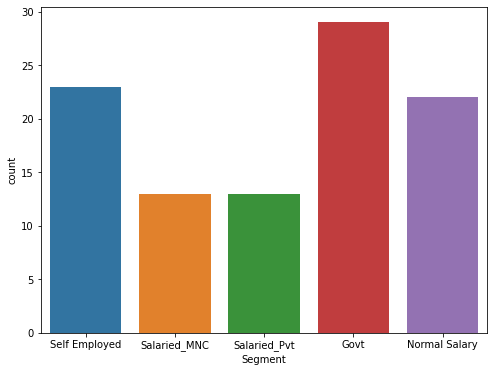

We can see from the countplot that number of distinct categories are 5


In [72]:
plt.figure(figsize=(8,6))
sns.countplot('Segment',data=customer)
plt.show()

print("We can see from the countplot that number of distinct categories are", len(customer["Segment"].value_counts()))

In [ ]:
# (c) What is the average monthly spend by customers?

In [73]:
spend['Month'] = pd.to_datetime(spend['Month'])
spend.head()

Sl No: Customer      Month       Type     Amount
0       1       A1 2004-01-12  JEWELLERY  485470.80
1       2       A1 2004-01-03      PETRO  410556.13
2       3       A1 2004-01-15    CLOTHES   23740.46
3       4       A1 2004-01-25       FOOD  484342.47
4       5       A1 2005-01-17     CAMERA  369694.07

In [74]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
spend.head()

Sl No: Customer      Month       Type     Amount  Monthly Yearly
0       1       A1 2004-01-12  JEWELLERY  485470.80  January   2004
1       2       A1 2004-01-03      PETRO  410556.13  January   2004
2       3       A1 2004-01-15    CLOTHES   23740.46  January   2004
3       4       A1 2004-01-25       FOOD  484342.47  January   2004
4       5       A1 2005-01-17     CAMERA  369694.07  January   2005

In [75]:
customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)

customer_spend_group

Sl No:     Amount
Yearly Monthly                     
2004   April      730.50  235272.04
       February   749.50  221215.27
       January    751.62  251712.07
       March      725.50  232146.12
       May        733.50  217539.24
       November   745.50  270486.40
       September  741.50  310923.38
2005   April      730.00  252181.33
       August     749.50  233734.63
       December   762.50  147503.06
       February   750.67  229802.28
       January    746.50  292741.37
       July       757.50  229116.66
       June       755.50  262688.11
       May        747.30  245696.52
       November   749.50  286143.32
       October    760.50  194568.64
       September  759.50  188666.20
2006   April      744.41  232468.97
       August     770.50  240699.72
       December   774.50  270470.98
       February   757.83  253858.26
       January    763.50  282058.01
       July       754.50  287505.10
       June       768.50  177252.39
       March      750.90  247166.08
       May        744.25  236162.74
       November   758.50  182841.29
       October    772.50  236136.34
       September  771.50  158520.09

In [ ]:
# (d) What is the average monthly repayment by customers?

In [76]:
repay.head(2)

SL No: Customer      Month     Amount
1     2.0       A1   3-Jan-04  245899.02
2     3.0       A1  15-Jan-04  259490.06

In [77]:
repay["Month"] = pd.to_datetime(repay["Month"])
repay.head(2)

SL No: Customer      Month     Amount
1     2.0       A1 2004-01-03  245899.02
2     3.0       A1 2004-01-15  259490.06

In [78]:
repay.dtypes

SL No:             float64
Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [79]:
repay["Month"] = pd.to_datetime(repay["Month"])

In [80]:
repay["Month"]

1      2004-01-03
2      2004-01-15
3      2004-01-25
4      2005-01-17
5      2005-02-23
          ...    
1495   2005-05-09
1496   2006-05-10
1497   2006-07-11
1498   2005-08-12
1499   2004-09-13
Name: Month, Length: 1499, dtype: datetime64[ns]

In [81]:


repay['Months'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Year'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))



In [82]:
repay

SL No: Customer      Month     Amount     Months  Year
1        2.0       A1 2004-01-03  245899.02    January  2004
2        3.0       A1 2004-01-15  259490.06    January  2004
3        4.0       A1 2004-01-25  437555.12    January  2004
4        5.0       A1 2005-01-17  165972.88    January  2005
5        6.0       A1 2005-02-23  365366.62   February  2005
...      ...      ...        ...        ...        ...   ...
1495  1496.0      A67 2005-05-09   55638.77        May  2005
1496  1497.0      A68 2006-05-10  319836.49        May  2006
1497  1498.0      A69 2006-07-11  247628.45       July  2006
1498  1499.0      A70 2005-08-12  454016.51     August  2005
1499  1500.0      A71 2004-09-13   56286.33  September  2004

[1499 rows x 6 columns]

In [83]:
repay_new= round(repay.groupby(['Year','Months']).mean(),2)

In [84]:
repay_new

SL No:     Amount
Year Months                      
2004 April      805.07  259141.68
     February   764.33  256702.63
     January    746.66  242586.69
     March      800.07  252585.28
     May        760.80  226162.72
     November   744.93  209592.24
     September  788.38  184487.85
2005 April      804.57  212688.63
     August     748.05  264430.92
     December   710.92  320379.34
     February   765.50  238829.27
     January    761.33  240548.10
     July       705.92  239871.48
     June       703.92  210199.82
     May        738.08  263207.37
     November   733.50  256695.12
     October    708.92  219849.96
     September  707.92  247700.17
2006 April      763.03  275472.25
     August     718.92  224143.99
     December   722.92  252736.57
     February   751.97  284489.57
     January    711.92  293475.39
     July       750.95  257936.38
     June       716.92  251990.45
     March      757.00  240851.27
     May        757.20  256920.88
     November   733.59  199399.20
     October    720.92  260765.48
     September  719.92  262533.88

In [ ]:
# (e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [91]:
customer_spend_repay = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")
customer_spend_repay.head(2)

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   

     Month_x       Type  Amount_x  SL No:    Month_y   Amount_y   Months  Year  
0  12-Jan-04  JEWELLERY  485470.8     2.0 2004-01-03  245899.02  January  2004  
1  12-Jan-04  JEWELLERY  485470.8     3.0 2004-01-15  259490.06  January  2004

In [92]:
customer_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [93]:
customer_spend_repay.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   

     Month_x       Type  Spend_Amount  SL No:    Month_y  Repay_Amount  \
0  12-Jan-04  JEWELLERY      485470.8     2.0 2004-01-03     245899.02   
1  12-Jan-04  JEWELLERY      485470.8     3.0 2004-01-15     259490.06   
2  12-Jan-04  JEWELLERY      485470.8     4.0 2004-01-25     437555.12   
3  12-Jan-04  JEWELLERY      485470.8     5.0 2005-01-17     165972.88   
4  12-Jan-04  JEWELLERY      485470.8     6.0 2005-02-23     365366.62   

     Months  Year  
0   January  2004  
1   January  2004  
2   January  2004  
3   January  2005  
4  February  2005

In [97]:

interest_group = customer_spend_repay.groupby(["Year","Months"])['Spend_Amount','Repay_Amount'].sum()


C:\Users\avita\AppData\Local\Temp/ipykernel_16168/2885577490.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["Year","Months"])['Spend_Amount','Repay_Amount'].sum()


In [98]:
interest_group

Spend_Amount  Repay_Amount
Year Months                               
2004 April      1.194516e+08  2.285403e+08
     February   7.613922e+07  1.602419e+08
     January    1.083214e+09  1.690292e+09
     March      5.594171e+07  8.974470e+07
     May        8.800456e+07  1.411594e+08
     November   5.504612e+07  7.860290e+07
     September  5.144278e+07  8.016122e+07
2005 April      9.366405e+07  1.747894e+08
     August     1.361400e+08  2.477449e+08
     December   4.348638e+07  9.944533e+07
     February   5.890557e+08  9.416163e+08
     January    1.324129e+08  1.810333e+08
     July       3.995653e+07  7.997268e+07
     June       1.174019e+08  2.213774e+08
     May        7.149030e+08  1.099197e+09
     November   1.532278e+08  2.763119e+08
     October    3.140993e+07  6.027830e+07
     September  3.195551e+07  7.530449e+07
2006 April      3.229722e+08  6.093666e+08
     August     5.849630e+07  7.167032e+07
     December   4.585222e+07  7.087702e+07
     February   1.654843e+08  2.903280e+08
     January    5.127574e+07  8.974491e+07
     July       1.444093e+08  2.245720e+08
     June       5.302118e+07  6.914431e+07
     March      7.393854e+08  1.115725e+09
     May        3.297954e+08  5.434823e+08
     November   1.124836e+08  1.355832e+08
     October    5.285823e+07  7.890924e+07
     September  5.395681e+07  8.083199e+07

In [ ]:
# f. What are the top 5 product types?

In [99]:
spend.head()

Sl No: Customer      Month       Type     Amount  Monthly Yearly
0       1       A1 2004-01-12  JEWELLERY  485470.80  January   2004
1       2       A1 2004-01-03      PETRO  410556.13  January   2004
2       3       A1 2004-01-15    CLOTHES   23740.46  January   2004
3       4       A1 2004-01-25       FOOD  484342.47  January   2004
4       5       A1 2005-01-17     CAMERA  369694.07  January   2005

In [100]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

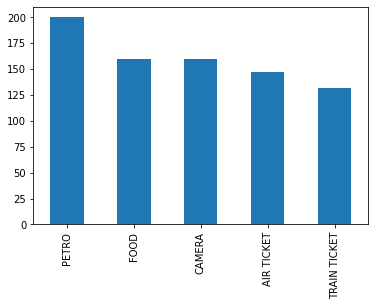

In [101]:
spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

In [ ]:
# g. Which city is having maximum spend?


In [102]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount  
0  12-Jan-04  JEWELLERY  485470.80  
1   3-Jan-04      PETRO  410556.13  
2  15-Jan-04    CLOTHES   23740.46  
3  25-Jan-04       FOOD  484342.47  
4  17-Jan-05     CAMERA  369694.07

In [103]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

In [104]:
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

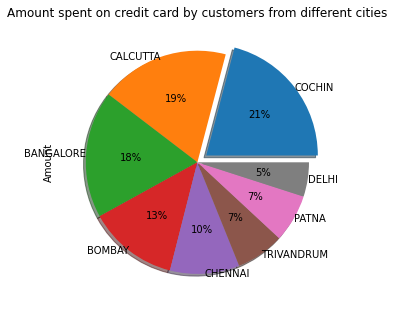

From above pie chart we can see that Cochin is having maximum spend.


In [105]:
plt.figure(figsize=(5,10))
city_spend.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

print("From above pie chart we can see that Cochin is having maximum spend.")

In [ ]:
# h. Which age group is spending more money?

In [106]:
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [107]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount Age Group  
0  12-Jan-04  JEWELLERY  485470.80     74-82  
1   3-Jan-04      PETRO  410556.13     74-82  
2  15-Jan-04    CLOTHES   23740.46     74-82  
3  25-Jan-04       FOOD  484342.47     74-82  
4  17-Jan-05     CAMERA  369694.07     74-82

In [109]:
#grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending oreder

age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)

In [110]:
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

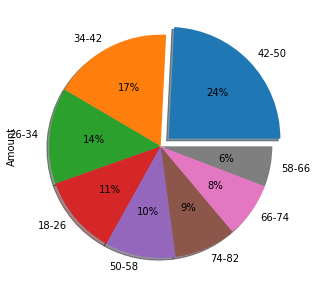

From the pie chart shown above we can say that age group 42 - 50 is spending more money


In [111]:
plt.figure(figsize=(5,10))
age_spend.plot(kind = "pie",autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()
print("From the pie chart shown above we can say that age group 42 - 50 is spending more money")

In [ ]:
# i. Who are the top 10 customers in terms of repayment?

In [112]:
customer_repay.head()

SL No: Customer      Month     Amount   Age       City Product     Limit  \
0     2.0       A1   3-Jan-04  245899.02  76.0  BANGALORE    Gold  500000.0   
1     3.0       A1  15-Jan-04  259490.06  76.0  BANGALORE    Gold  500000.0   
2     4.0       A1  25-Jan-04  437555.12  76.0  BANGALORE    Gold  500000.0   
3     5.0       A1  17-Jan-05  165972.88  76.0  BANGALORE    Gold  500000.0   
4     6.0       A1  23-Feb-05  365366.62  76.0  BANGALORE    Gold  500000.0   

  Company        Segment  
0      C1  Self Employed  
1      C1  Self Employed  
2      C1  Self Employed  
3      C1  Self Employed  
4      C1  Self Employed

In [ ]:
#grouping based on "Customer" column to find top 10 customers
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

In [ ]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [113]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount Age Group  
0  12-Jan-04  JEWELLERY  485470.80     74-82  
1   3-Jan-04      PETRO  410556.13     74-82  
2  15-Jan-04    CLOTHES   23740.46     74-82  
3  25-Jan-04       FOOD  484342.47     74-82  
4  17-Jan-05     CAMERA  369694.07     74-82

In [114]:
#converting "Month" column to date time 


customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])

In [115]:
#creating new column "year" 

customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [116]:
customer_spend.head(2)

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   

       Month       Type     Amount Age Group  Year  
0 2004-01-12  JEWELLERY  485470.80     74-82  2004  
1 2004-01-03      PETRO  410556.13     74-82  2004

In [117]:
customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

In [118]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

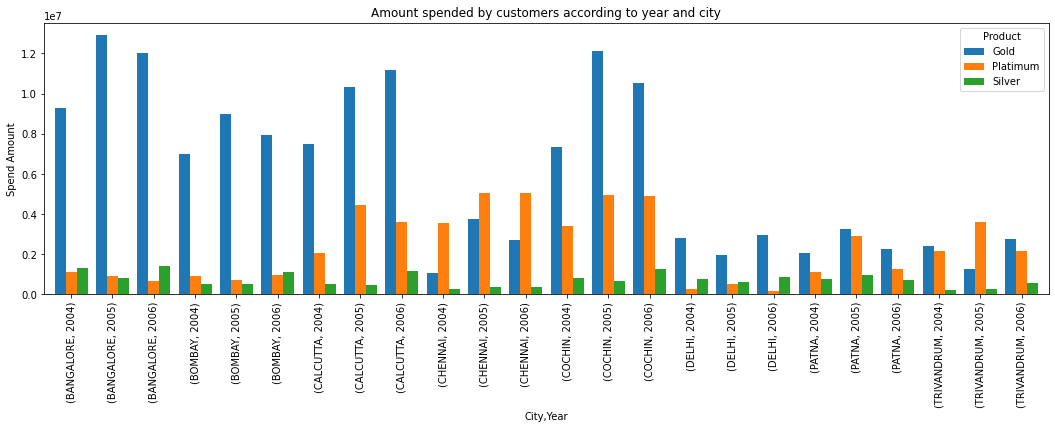

In [119]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

In [ ]:
# 4. Create graphs for
  #a. Monthly comparison of total spends, city wise

In [120]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount Age Group  Year  
0 2004-01-12  JEWELLERY  485470.80     74-82  2004  
1 2004-01-03      PETRO  410556.13     74-82  2004  
2 2004-01-15    CLOTHES   23740.46     74-82  2004  
3 2004-01-25       FOOD  484342.47     74-82  2004  
4 2005-01-17     CAMERA  369694.07     74-82  2005

In [121]:
#creating new column "Monthly" 
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [122]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount Age Group  Year  Monthly  
0 2004-01-12  JEWELLERY  485470.80     74-82  2004  January  
1 2004-01-03      PETRO  410556.13     74-82  2004  January  
2 2004-01-15    CLOTHES   23740.46     74-82  2004  January  
3 2004-01-25       FOOD  484342.47     74-82  2004  January  
4 2005-01-17     CAMERA  369694.07     74-82  2005  January

In [123]:
#grouping data based on "Monthly" and "City" columns

month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [124]:
#creating pivot table based on "Monthly" and "City" columns

month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

In [125]:
month_city

Monthly          April      August   December    February      January  \
City                                                                     
BANGALORE   4207980.48   695061.95  422167.24  6734494.76   9041796.84   
BOMBAY      1873785.01  1066744.75  140040.71  4276988.30   5948993.33   
CALCUTTA    3457507.95  1548354.02   55001.50  8150545.61   9064864.90   
CHENNAI     2518656.99   305875.97  223628.27  4385815.95   4466961.36   
COCHIN      3882744.94  2317306.61  909533.05  5747886.38  11714373.54   
DELHI        777240.75   155402.16  842342.02  1494064.06   2714261.45   
PATNA       2338179.53   419383.64   50000.00  2353333.55   4916205.55   
TRIVANDRUM  1199293.45   453773.94  640922.26  2857123.89   3704336.99   

Monthly           July        June       March         May    November  \
City                                                                     
BANGALORE   2228217.69  1330685.90  5362903.07  6383115.13  2260603.07   
BOMBAY       177726.32  1172594.97  5227850.50  3891945.60  2872049.40   
CALCUTTA    2234573.27  2293045.81  4939040.04  5578246.87  2078880.93   
CHENNAI      693825.77  1244242.16  3183643.71  2856199.62  1347779.28   
COCHIN      1290897.30  2495745.07  5645146.53  6581085.69  3127999.60   
DELHI         50001.50   511276.09  2267149.02  1600322.07   391610.96   
PATNA         50000.00   746186.13  1437166.61  2136586.80   413677.87   
TRIVANDRUM   260484.50   400336.83  2392316.51  2813534.48   143387.40   

Monthly        October   September  
City                                
BANGALORE   1091602.61   703018.28  
BOMBAY       676005.70  1278402.79  
CALCUTTA     196357.83  1511713.57  
CHENNAI      156247.17   745759.40  
COCHIN       868551.89  1382242.90  
DELHI         64615.46    50001.00  
PATNA        329537.34    70329.95  
TRIVANDRUM   285581.92   186063.70

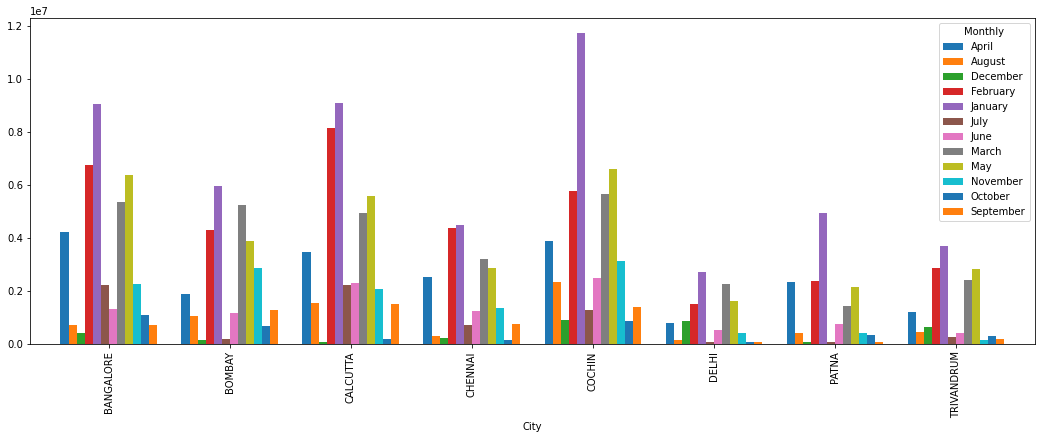

In [126]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

In [127]:
#  b. Comparison of yearly spend on air tickets

In [128]:
customer_spend.head()

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   
2       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       3   
3       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       4   
4       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       5   

       Month       Type     Amount Age Group  Year  Monthly  
0 2004-01-12  JEWELLERY  485470.80     74-82  2004  January  
1 2004-01-03      PETRO  410556.13     74-82  2004  January  
2 2004-01-15    CLOTHES   23740.46     74-82  2004  January  
3 2004-01-25       FOOD  484342.47     74-82  2004  January  
4 2005-01-17     CAMERA  369694.07     74-82  2005  January

In [129]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [130]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

In [131]:
filtered

Year        Type       Amount
0   2004  AIR TICKET   4357225.35
15  2005  AIR TICKET  10550152.21
30  2006  AIR TICKET   5248469.56

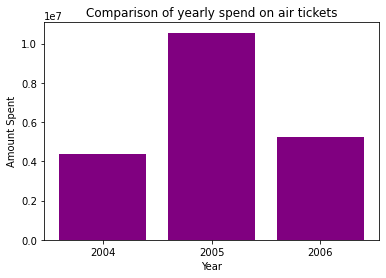

In [132]:
plt.bar(filtered["Year"],height=filtered["Amount"],color="purple")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

In [133]:
# c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)

IndentationError: unexpected indent (Temp/ipykernel_16168/451504139.py, line 2)

In [134]:
customer_spend.head(2)

Customer   Age       City Product     Limit Company        Segment  Sl No:  \
0       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       1   
1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed       2   

       Month       Type     Amount Age Group  Year  Monthly  
0 2004-01-12  JEWELLERY  485470.80     74-82  2004  January  
1 2004-01-03      PETRO  410556.13     74-82  2004  January

In [135]:
#creating pivot table based on "Monthly" and "Product" columns

product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

In [136]:
product_wise

Monthly         April      August    December     February      January  \
Product                                                                   
Gold      13170572.59  4954030.42  2332940.96  24779179.55  32413831.83   
Platimum   5182493.86  1714762.80   750156.19   9134054.58  14951578.51   
Silver     1902322.65   293109.82   200537.90   2087018.37   4206383.62   

Monthly         July        June        March          May    November  \
Product                                                                  
Gold      5167416.37  6538862.64  19256972.48  21548169.76  9203267.46   
Platimum  1288156.26  2965712.71   7288837.68   8151926.49  2741618.42   
Silver     530153.72   689537.61   3909405.83   2140940.01   691102.63   

Monthly      October   September  
Product                           
Gold      3018223.38  3816887.62  
Platimum   550275.04  1667840.84  
Silver     100001.50   442803.13

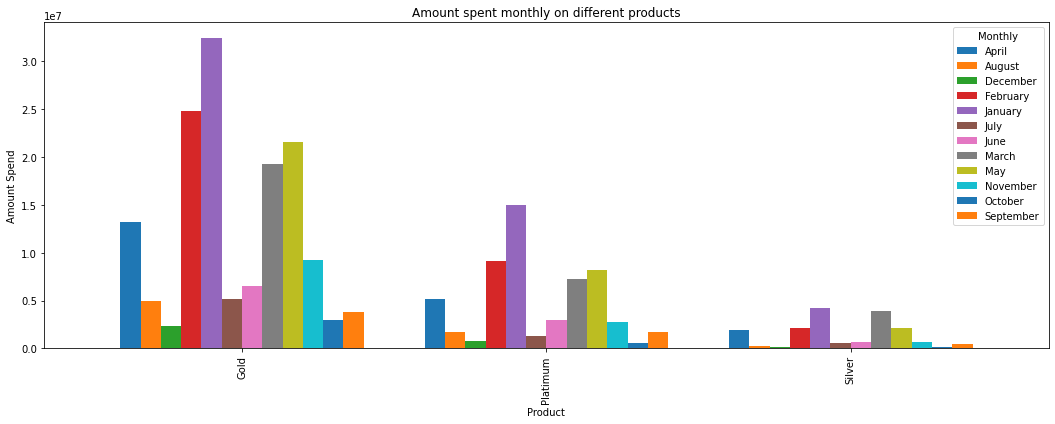

In [137]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

In [138]:
#5. Write user defined PYTHON function to perform the following analysis:
 You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers

IndentationError: unexpected indent (Temp/ipykernel_16168/2892642841.py, line 2)

In [139]:
customer_repay.head(2)

SL No: Customer      Month     Amount   Age       City Product     Limit  \
0     2.0       A1   3-Jan-04  245899.02  76.0  BANGALORE    Gold  500000.0   
1     3.0       A1  15-Jan-04  259490.06  76.0  BANGALORE    Gold  500000.0   

  Company        Segment  
0      C1  Self Employed  
1      C1  Self Employed

In [140]:
# converting 'Month' column to date time format

customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])

In [141]:
customer_repay['Month']

0      2004-01-03
1      2004-01-15
2      2004-01-25
3      2005-01-17
4      2005-02-23
          ...    
1494   2005-11-22
1495   2005-12-03
1496   2005-02-23
1497   2006-03-31
1498   2004-01-03
Name: Month, Length: 1499, dtype: datetime64[ns]

In [142]:
#creating new column "Monthly" and "Yearly" using already existing 'Month' column

customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [143]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [144]:
summary_report('gold','monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        1912391.54   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na